In [2]:
# importing packages

import matplotlib   # library for plotting
import matplotlib.pyplot as plt #  later you will type plt.$COMMAND
import numpy as np   # basic math library  you will type np.$STUFF  e.g., np.cos(1)
import pandas as pd  # library for data analysis for text files (everything but netcdf files)
import scipy.stats as stats # imports stats functions https://docs.scipy.org/doc/scipy/reference/stats.html 

In [12]:
# Question 1a: Bayesian statistics

P_n  = 0.9 # percent of population covid negative
P_p  = 0.1 # percent of population covid positive
P_t  = 0.8 # probability that test is correct 
P_f  = 0.2 # probability that test is incorrect 

# Probability of true negative using equ. 23 from Barnes
P_tf = P_t*P_n/(P_t*P_n + P_f*P_p)
print('The probability of testing negative and actually being negative is:', P_tf)


The probility of testing negative and actually being negative is: 0.9729729729729729


In [51]:
# Question 1c: comparing two sample means
# I will use the atmospheric pressure and precipitation data from Questions 2

# loading data
filename='homework1_data.csv'
data=pd.read_csv(filename,sep=',')
data.head()

# Taking 2 sample means: when precip is small < 0.1, when precip is large > 0.1
P_avg_precip_s=data[np.logical_and(data.R_inches >= 0.01,data.R_inches < 0.1)]['P_hPa'].mean() #avg precip is small
P_avg_precip_l=data[data.R_inches >= 0.1]['P_hPa'].mean() #avg precip is large 

#getting the length of each sample
N_avg_precip_s =len(data[np.logical_and(data.R_inches >= 0.01,data.R_inches < 0.1)]['P_hPa'])
N_avg_precip_l= len(data[data.R_inches >= 0.1]['P_hPa']) #avg precip is large 
# both samples are larger than 30 so we can use the z-test

#getting standard deviations of each sample
P_std_precip_s  = data[np.logical_and(data.R_inches >= 0.01,data.R_inches < 0.1)]['P_hPa'].std()
P_std_precip_l  = data[data.R_inches >= 0.1]['P_hPa'].std()

#calculating z-score from Barnes equ. 108
S1_mean = P_avg_precip_s
S2_mean = P_avg_precip_l
S1_std  = P_std_precip_s
S2_std  = P_std_precip_l
S1_N    = N_avg_precip_s
S2_N    = N_avg_precip_l

Z = (S1_mean - S2_mean)/(((S1_std**2/S1_N)+ (S2_std**2/S2_N))**(1/2))
print('The Z-score is:',np.round(Z,2))

5.853330790455526
The Z-score is: 0.68


In [47]:
# Question 1d: placing confidence intervals on R_inches > 0.1 

# z-test
zstat95=stats.norm.ppf(0.95)
Z_low_limit95=P_avg_precip_l-zstat95*(P_std_precip_l/np.sqrt(N_avg_precip_l))
Z_high_limit95=P_avg_precip_l+zstat95*(P_std_precip_l/np.sqrt(N_avg_precip_l))
print("95% confidence limits - z-statistic")
print(np.round(Z_low_limit95,2))
print(np.round(Z_high_limit95,2))

95% confidence limits - z-statistic
845.02
847.92


In [49]:
#Question 1e: F-statistic
fcrit = stats.f.ppf(q = 0.95, dfn = S1_N-1, dfd = S2_N-1)
print(np.round(fcrit,4))
# Step #5: Calculate f statistic and Assess findings. 
f=S1_std**2/S2_std**2
print(np.round(f,4))
print('SUMMARY: f<fcrit so we cannot reject our null hypothesis that period1 and period2 have the same standard deviation')

1.5102
0.8286
SUMMARY: f<fcrit so we cannot reject our null hypothesis that period1 and period2 have the same standard deviation


In [3]:
# Question 2: reloading data
filename='homework1_data.csv'
data=pd.read_csv(filename,sep=',')
data.head()

,P_hPa,R_inches
0,842.63,0.0
1,842.58,0.0
2,842.13,0.0
3,842.38,0.0
4,842.57,0.0


In [53]:
# Question 2a: calculating averages

#calculating 2014 Pressure average
P_avg=data['P_hPa'].mean()
print('The 2014 average atmospheric pressure in Fort Collins was', np.round(P_avg,2), 'hPa.')

#calculating 2014 pressure average when raining 
P_avg_precip=data[data.R_inches >= 0.01]['P_hPa'].mean()
print('The 2014 average atmospheric pressure during rainfall in Fort Collins was', np.round(P_avg_precip,2), 'hPa.')

The 2014 average atmospheric pressure in Fort Collins was 846.33 hPa.
The 2014 average atmospheric pressure during rainfall in Fort Collins was 847.03 hPa.


In [5]:
# Question 2b: calculating 95% confidence intervals 

# calculating needed parameters
N_total = len(data.P_hPa)
#print(N_total)

N_rain = len(data[data.R_inches >= 0.01].P_hPa)
#print(N_rain)

P_std_precip = data[data.R_inches >= 0.01]['P_hPa'].std()
#print(P_std_precip)

df = N_rain - 1
#print(df)

# t-test
tstat95=stats.t.ppf(0.95,df)
T_low_limit95=P_avg_precip-tstat95*(P_std_precip/np.sqrt(df))
T_high_limit95=P_avg_precip+tstat95*(P_std_precip/np.sqrt(df))
print("95% confidence limits - t-statistic")
print(np.round(T_low_limit95,2))
print(np.round(T_high_limit95,2))

# z-test
zstat95=stats.norm.ppf(0.95)
Z_low_limit95=P_avg_precip-zstat95*(P_std_precip/np.sqrt(N_rain))
Z_high_limit95=P_avg_precip+zstat95*(P_std_precip/np.sqrt(N_rain))
print("95% confidence limits - z-statistic")
print(np.round(Z_low_limit95,2))
print(np.round(Z_high_limit95,2))

95% confidence limits - t-statistic
846.58
847.48
95% confidence limits - z-statistic
846.58
847.48


In [55]:
# Question 2c: bootstrapping to generate a distribution of randomly selected 
# mean pressure when raining  

### Now Bootstrap Nbs times SWE.
Nbs=10000
## initialize array
P_Bootstrap=np.empty((Nbs,N_rain))
## loop over to fill in array with randomly selected values
for ii in range(Nbs):
    P_Bootstrap[ii,:]=np.random.choice(data.P_hPa,N_rain)

## Calculate the means of your randomly selected SWE values.
P_Bootstrap_mean=np.mean(P_Bootstrap,axis=1)
#print(len(P_Bootstrap_mean))  ## check length to see if you averaged across the correct axis

P_Bootstrap_mean_avg=np.mean(P_Bootstrap_mean)
print('Mean bootstrapped P:', np.round(P_Bootstrap_mean_avg,2))
P_Bootstrap_mean_std=np.std(P_Bootstrap_mean)
print('std bootstrapped P:',np.round(P_Bootstrap_mean_std,2))
P_Bootstrap_mean_min=np.min(P_Bootstrap_mean)
print('Min bootstrapped P:',np.round(P_Bootstrap_mean_min,2))
P_Bootstrap_mean_max=np.max(P_Bootstrap_mean)
print('Max bootstrapped P:',np.round(P_Bootstrap_mean_max,2))

Mean bootstrapped P: 846.33
std bootstrapped P: 0.29
Min bootstrapped P: 845.37
Max bootstrapped P: 847.43


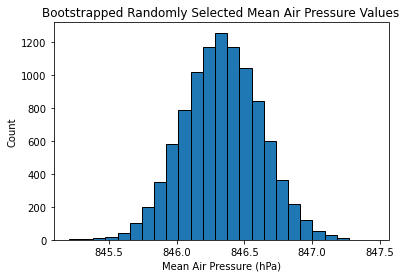

In [12]:
# Question 2c cont...

# plotting bootstrapped distribution 
binsize=0.1
min4hist=np.round(np.min(P_Bootstrap_mean),1)-binsize
max4hist=np.round(np.max(P_Bootstrap_mean),1)+binsize
nbins=int((max4hist-min4hist)/binsize)

plt.hist(P_Bootstrap_mean,nbins,edgecolor='black')
plt.xlabel('Mean Air Pressure (hPa)');
plt.ylabel('Count');
plt.title('Bootstrapped Randomly Selected Mean Air Pressure Values');

In [14]:
# Question 2c cont...

#calculating probability that air pressure is higher when it is raining
# compared to randomly distributed bootstraped distribution

sample_mean=P_avg_precip
sample_N=1
population_mean=np.mean(P_Bootstrap_mean)
population_std=np.std(P_Bootstrap_mean)
xstd=population_std/np.sqrt(sample_N)
z_precip=(sample_mean-population_mean)/xstd
print("Z-statistic (number of standard errors that the sample mean deviates from the population mean:")
print(np.round(z_precip,2))
prob=(1-stats.norm.cdf(np.abs(z_precip)))*100 ##this is a one-sided test
print("Probability one-tailed test (percent):")
print(np.round(prob,2)) 

Z-statistic (number of standard errors that the sample mean deviates from the population mean:
2.45
Probability one-tailed test (percent):
0.72
